In [1]:
import os
import cv2
from google.colab.patches import cv2_imshow

import pandas as pd
import numpy as np

path  = '/content/Covid-19-PIS-2/train'

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RGxc5sRzP2OLU5sz4roQ")
project = rf.workspace("pyimagesearch").project("covid-19-pis")
version = project.version(2)
dataset = version.download("multiclass")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Covid-19-PIS-2 in multiclass:: 100%|██████████| 1283/1283 [00:00<00:00, 7005.81it/s]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
def extract_image(x) :



  img_path = os.path.join(path,x)

  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  img = cv2.resize(img,(224,224))

  img = np.repeat(img[..., np.newaxis], 3, -1)

  return img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]], dtype=uint8)
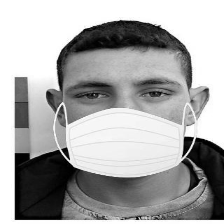

In [78]:
extract_image('25-with-mask_jpg.rf.0aa53dada1d2cc1936ce3af65df6e316.jpg')

In [79]:
data = pd.read_csv('/content/Covid-19-PIS-2/train/_classes.csv')

data.head()

,filename,with_mask,without_mask
0,26-with-mask_jpg.rf.fb2a4fd14461ba4e7d981f51d9...,1,0
1,66_jpg.rf.fb48333563aba0cd06afba343f625d98.jpg,0,1
2,153-with-mask_jpg.rf.fb584ce29ce6d9a3123a04d80...,1,0
3,29-with-mask_jpg.rf.fb9ecac8d3dc335a43b79a9438...,1,0
4,augmented_image_315_jpg.rf.fba9c25c6675c5a039f...,1,0


In [80]:
data.columns = ['filename', 'with_mask', 'without_mask']

In [81]:
data['pixel'] = data['filename'].apply(extract_image)

In [82]:
data.sample(10)

,filename,with_mask,without_mask,pixel
1200,466-with-mask_jpg.rf.571286bfb1ffbde3951cb73d0...,1,0,"[[[253, 253, 253], [252, 252, 252], [255, 255,..."
397,183_jpg.rf.11db2c1f2dcdff76180a6a71bd1571fd.jpg,0,1,"[[[251, 251, 251], [253, 253, 253], [248, 248,..."
69,augmented_image_120_jpg.rf.9ef9926259321815f1d...,0,1,"[[[245, 245, 245], [249, 249, 249], [246, 246,..."
302,augmented_image_237_jpg.rf.02e50ea8bdabaec6906...,0,1,"[[[130, 130, 130], [146, 146, 146], [139, 139,..."
669,89_jpg.rf.846184ba083e9ab2685b6059c8d5b730.jpg,0,1,"[[[33, 33, 33], [55, 55, 55], [70, 70, 70], [8..."
411,augmented_image_171_jpg.rf.1a45cb2f6781b18f043...,0,1,"[[[253, 253, 253], [254, 254, 254], [255, 255,..."
1219,204_jpg.rf.5d05cd5438cc83765448ae3c7988ebe6.jpg,0,1,"[[[253, 253, 253], [253, 253, 253], [254, 254,..."
65,459-with-mask_jpg.rf.9d20fd7494e3c50c28b75ac28...,1,0,"[[[187, 187, 187], [189, 189, 189], [190, 190,..."
368,106_jpg.rf.112b6c0384275b88eff762f1b87440f1.jpg,0,1,"[[[221, 221, 221], [214, 214, 214], [208, 208,..."
99,augmented_image_58_jpg.rf.a62a369b5838d382a4aa...,1,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


In [83]:
data = data.sample(frac=1)

In [84]:
data.drop(['filename','without_mask'],axis=1,inplace=True)

In [85]:
X = np.array(data['pixel'].tolist())

In [86]:
y = data['with_mask'].values

In [87]:
X.shape , y.shape

((1279, 224, 224, 3), (1279,))

In [88]:
data['with_mask'].value_counts()

with_mask
1    644
0    635
Name: count, dtype: int64

In [89]:
from keras.layers import Dense

In [90]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3)

In [91]:
from keras.applications.vgg16 import VGG16
vgg = VGG16()

In [92]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [93]:
from keras import Sequential

model = Sequential()

In [94]:
for layer in vgg.layers[:-1] :
  model.add(layer)

In [95]:
for layer in vgg.layers[:-1] :
  layer.trainable = False

In [96]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [97]:
model.add(Dense(1,activation='sigmoid'))

In [98]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [99]:
model.compile(optimizer = 'Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [100]:
model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
28/28 [==============================] - 7s 237ms/step - loss: 0.1976 - accuracy: 0.9128 - val_loss: 0.0534 - val_accuracy: 0.9766
Epoch 2/5
28/28 [==============================] - 5s 183ms/step - loss: 0.0273 - accuracy: 0.9888 - val_loss: 0.0318 - val_accuracy: 0.9870
Epoch 3/5
28/28 [==============================] - 5s 188ms/step - loss: 0.0130 - accuracy: 0.9978 - val_loss: 0.0281 - val_accuracy: 0.9896
Epoch 4/5
28/28 [==============================] - 5s 188ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0265 - val_accuracy: 0.9896
Epoch 5/5
28/28 [==============================] - 6s 223ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 0.9870


In [101]:

# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json

In [102]:
# serialize model to JSON
model_json = model.to_json()
with open("model_bw.json", "w") as json_file:
    json_file.write(model_json)

In [107]:
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/face_mask/model_bw.h5")
print("Saved model to disk")

Saved model to disk


In [104]:
def detect_face_mask(img):

  y_pred = model.predict(img.reshape(1,224,224,3),verbose=0)

  return 0 if y_pred[0][0] < 0.6 else 1

In [106]:
sample1 = cv2.resize(cv2.imread(path + '/'+ '15_jpg.rf.53c1d2e1b73290b01e50777f60c703bc.jpg'),(224,224))
detect_face_mask(sample1)

0